In [ ]:
pip install PyPDF2 textblob matplotlib nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


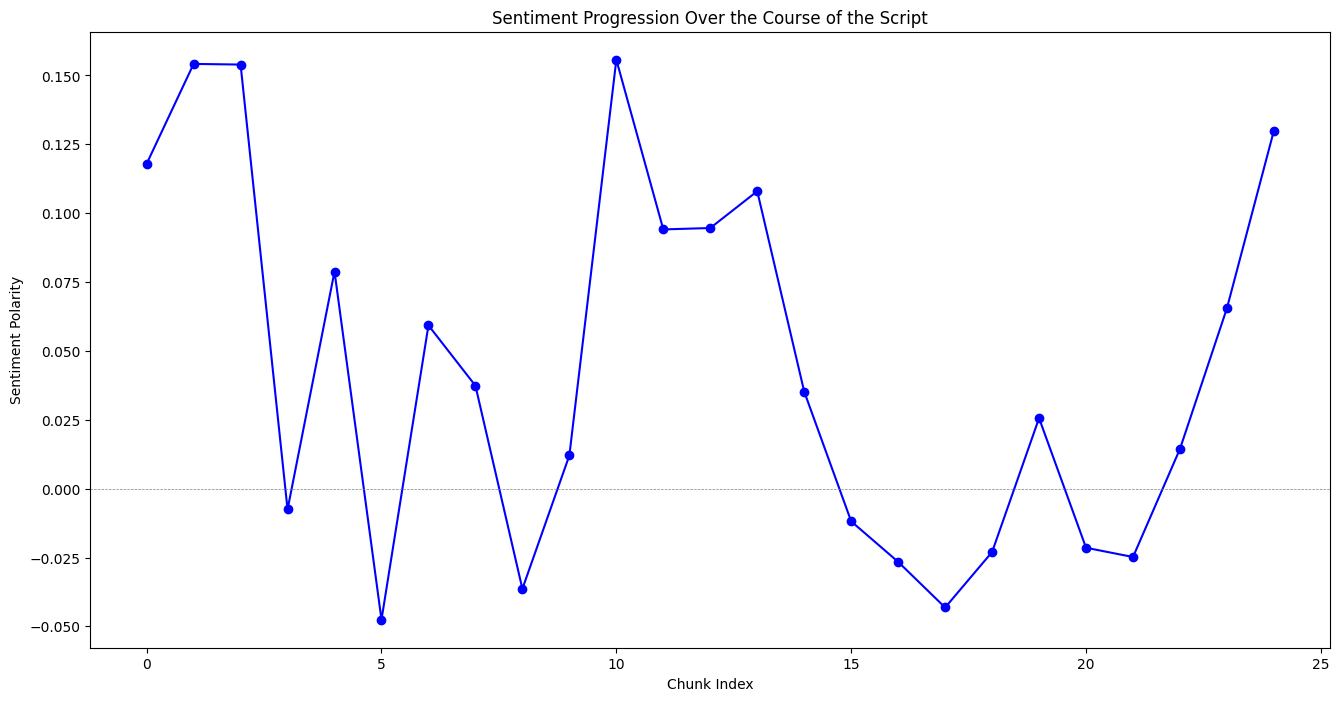

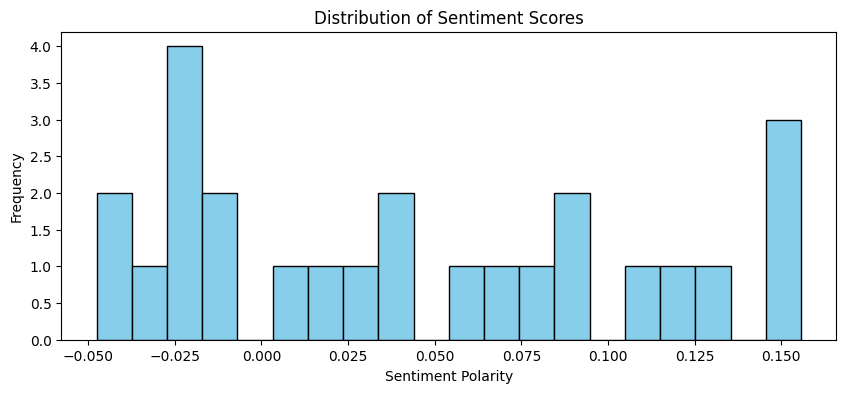

In [ ]:
import os
import PyPDF2
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk

# Download necessary NLTK data (run this once)
nltk.download('punkt')

def extract_text_from_pdf(pdf_path):
    """Extracts text from a PDF file."""
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
    return text

def analyze_sentiment(text):
    """Analyzes the sentiment of the text using TextBlob."""
    blob = TextBlob(text)
    return blob.sentiment.polarity

#chunk size
def sentiment_analysis_over_time(script_text, chunk_size=1000):
    """Analyzes sentiment over time by breaking the script into chunks."""
    words = script_text.split()
    chunks = [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]

    sentiment_scores = [analyze_sentiment(chunk) for chunk in chunks]
    return sentiment_scores

def plot_sentiment_over_time(sentiment_scores):
    """Creates a visualization for the sentiment progression over time."""
    plt.figure(figsize=(16, 8))
    plt.plot(sentiment_scores, marker='o', linestyle='-', color='b')
    plt.title('Sentiment Progression Over the Course of the Script')
    plt.xlabel('Chunk Index')
    plt.ylabel('Sentiment Polarity')
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.show()

def plot_sentiment_distribution(sentiment_scores):
    """Plots the distribution of sentiment scores across the script."""
    plt.figure(figsize=(10, 4))
    plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Sentiment Scores')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()

def process_script_sentiment(pdf_path):
    """Main function to process the script and run analysis."""
    # Extract text from the PDF
    script_text = extract_text_from_pdf(pdf_path)

    # Perform sentiment analysis over time
    sentiment_scores = sentiment_analysis_over_time(script_text, chunk_size=1000)  # Adjust chunk size as needed

    # Plot sentiment progression over time
    plot_sentiment_over_time(sentiment_scores)

    # Plot sentiment distribution
    plot_sentiment_distribution(sentiment_scores)

# Example usage
pdf_path = '/RATATOUILLE.pdf'
process_script_sentiment(pdf_path)


In [ ]:
def get_top_and_bottom_chunks(script_text, chunk_size=1000):
    """Finds the top 3 highest and bottom 3 lowest sentiment chunks in the script."""
    # Perform sentiment analysis over time
    words = script_text.split()
    chunks = [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]
    sentiment_scores = [analyze_sentiment(chunk) for chunk in chunks]

    # Pair chunks with their sentiment scores
    chunk_sentiments = list(zip(sentiment_scores, chunks))

    # Sort by sentiment score to find the top 3 and bottom 3
    chunk_sentiments.sort(key=lambda x: x[0])

    # Extract top 3 highest and bottom 3 lowest
    lowest_chunks = chunk_sentiments[:5]
    highest_chunks = chunk_sentiments[-5:]

    # Print the results
    print("\nTop 3 Highest Scoring Chunks:")
    for score, chunk in highest_chunks:
        print(f"Score: {score:.3f}\nChunk: {chunk[:1000]}...\n")  # Print the first 200 characters of the chunk for preview

    print("\nBottom 3 Lowest Scoring Chunks:")
    for score, chunk in lowest_chunks:
        print(f"Score: {score:.3f}\nChunk: {chunk[:1000]}...\n")  # Print the first 200 characters of the chunk for preview

# Example usage
pdf_path = '/RATATOUILLE.pdf'
script_text = extract_text_from_pdf(pdf_path)
get_top_and_bottom_chunks(script_text, chunk_size=1000)



Top 3 Highest Scoring Chunks:
Score: 0.138
Chunk: to a heating pan. Linguini JERKS forward, tilting his toque over the pan, then PEELS OUT of his station, once again on the move. INT. KITCHEN - SAME TIME 67 67 Linguini ZIPS about snatching ingredients from the other cooks stations, a Porche apologizing for its driver. LINGUINI (ad-lib to cooks) Pardon me, just need to borrow this real quick, sorry, apparently I need this, I’ll be right back -- To the others, Linguini looks deranged; a man who’s clearly lost control of both his body and his faculties. Linguini careens back into his station and DUMPS the ingredients into his pan, startling Colette. COLETTE What are you doing? We are supposed to be preparing the Gusteau recipe. LINGUINI (stirring, flipping pan) I’m, uh, this is the recipe-- COLETTE The recipe doesn’t call for white truffle oil! What else have you-- COLETTE (she looks in his pan) You are improvising?? This is no time to experiment, the customers are waiting! LINGUINI You’

In [ ]:
import nltk
from collections import Counter
from nltk.corpus import stopwords

# Download necessary NLTK data (run this once)
nltk.download('stopwords')
nltk.download('punkt')

def get_most_used_words(script_text, num_words=10):
    """Finds the most frequently used words in the script, excluding common stopwords."""
    # Tokenize the script into words
    words = nltk.word_tokenize(script_text.lower())

    # Remove punctuation and stopwords
    words = [word for word in words if word.isalnum()]  # Keep only alphanumeric words
    filtered_words = [word for word in words if word not in stopwords.words('english')]

    # Count the frequency of each word
    word_counts = Counter(filtered_words)

    # Get the most common words
    most_common_words = word_counts.most_common(num_words)

    # Print the results
    print(f"\nTop {num_words} Most Used Words:")
    for word, count in most_common_words:
        print(f"Word: {word}, Count: {count}")

# Example usage
get_most_used_words(script_text, num_words=10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Top 10 Most Used Words:
Word: remy, Count: 558
Word: linguini, Count: 499
Word: skinner, Count: 239
Word: colette, Count: 189
Word: gusteau, Count: 186
Word: int, Count: 122
Word: emile, Count: 120
Word: kitchen, Count: 120
Word: ego, Count: 102
Word: back, Count: 83
